In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/vivekdahal/Downloads/spotify.csv")

In [3]:
df.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


### ** *1. How popular are tracks generally?* 

In [5]:
df['track_id'].nunique()

89741

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

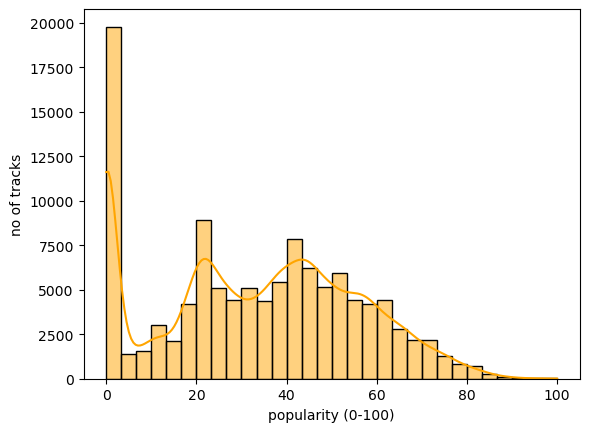

In [7]:
sns.histplot(df['popularity'],bins = 30 , kde = True, color = 'orange')

plt.xlabel('popularity (0-100)')
plt.ylabel('no of tracks')
plt.show()

#### Maximum tracks are below the 10 popularity rating, which means they are undiscovered tracks, with almost no plays. Very few tracks are above the 70 popularity metric.  The spike at the start of the graph shows how almost 20,000 tracks are basically undiscovered and have no plays, and how only a handful make it into the popular music world

### *2. Top ten track genres?*

In [10]:
df['track_genre'].nunique()

114

/var/folders/rm/chq1zyxd0915d6m6tslpc4100000gn/T/ipykernel_7341/2142794687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_genre.values, y= top_genre.index , palette = 'magma' )


Text(0.5, 1.0, 'top tracks')

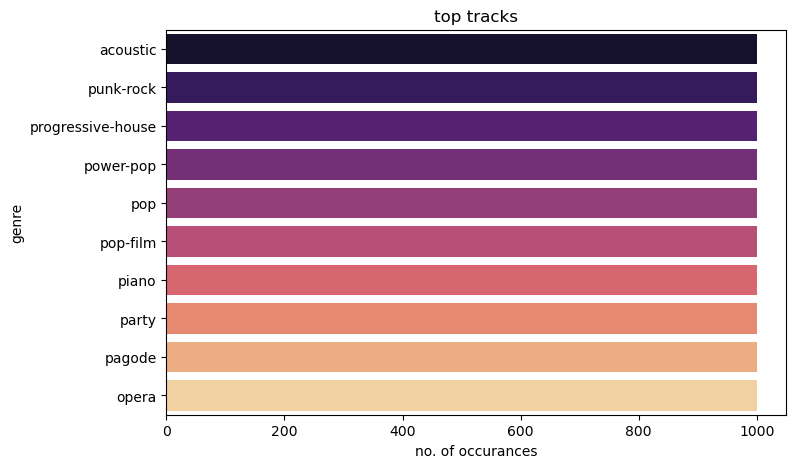

In [11]:
top_genre = df['track_genre'].value_counts().head(10)
plt.figure(figsize=(8,5))  #(width,height)
sns.barplot(x = top_genre.values, y= top_genre.index , palette = 'magma' )
plt.xlabel('no. of occurances')
plt.ylabel('genre')
plt.title('top tracks')

In [12]:
 df['track_genre'].value_counts().tail()

track_genre
folk           1000
emo            1000
electronic     1000
electro        1000
world-music    1000
Name: count, dtype: int64

In [13]:
((df['track_genre'].value_counts())<1000 )

track_genre
acoustic             False
punk-rock            False
progressive-house    False
power-pop            False
pop                  False
                     ...  
folk                 False
emo                  False
electronic           False
electro              False
world-music          False
Name: count, Length: 114, dtype: bool

#### According to the analysis, all 114 tracks have an occuring frequency of 1000, indicating even distribution accross the data set

### *3. Popularity vs Danceability*

In [23]:
data = pd.DataFrame({
    'danceability': df['danceability'],
    'popularity': df['popularity']
})
corr = data.corr()

<Axes: >

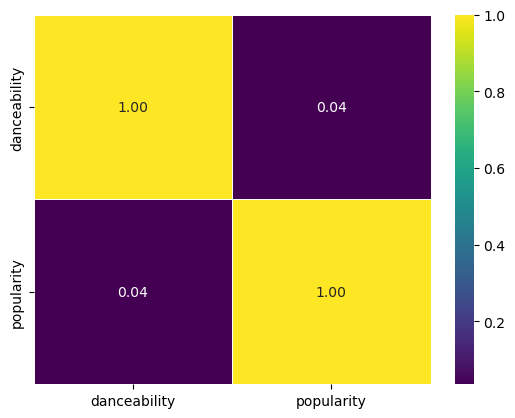

In [31]:
sns.heatmap(corr,annot=True,cmap='viridis',fmt='.2f' , linewidths = 0.5 )

#### Pearson correlation range is -1 to 1. -1 indicating negative correlation and +1 indicating positive correlation. 0.04 means there is not a good relationship between popularity and danceability and that one cannot determine the value of another 

Text(0.5, 1.0, 'popularity vs danceability (sample of 2000)')

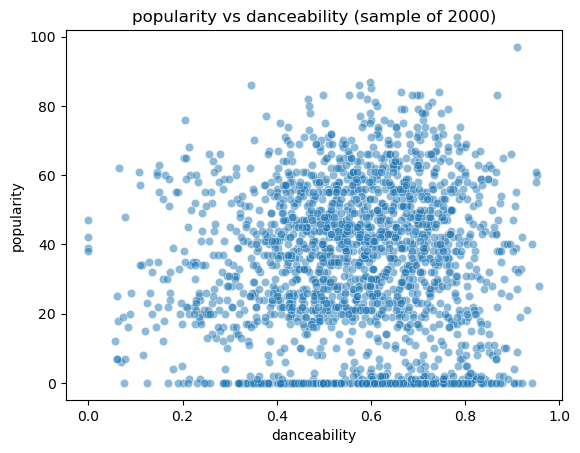

In [52]:
sns.scatterplot(x='danceability', y= 'popularity', data=df.sample(2000), alpha =0.5)
plt.title('popularity vs danceability (sample of 2000)')

#### We can see that the dots are all over the plot. We have tracks having high danceability and high popularity and vice-versa too. This indicates that majority data is not leaning towards any particular direction and one is not related with the other field.

### *4. Average energy level by genre*

In [150]:
energyLevel=df.groupby('track_genre')['energy'].mean().sort_values().tail(10)
print(energyLevel)

track_genre
j-idol           0.868677
party            0.871237
heavy-metal      0.874003
black-metal      0.874897
drum-and-bass    0.876635
hardstyle        0.901246
happy            0.910971
metalcore        0.914485
grindcore        0.924201
death-metal      0.931470
Name: energy, dtype: float64


Text(0, 0.5, 'genre')

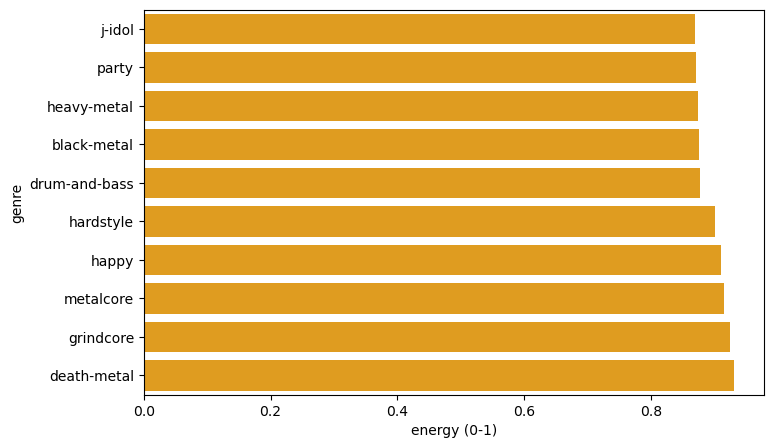

In [152]:
plt.figure(figsize=(8,5))
sns.barplot(x=energyLevel.values , y=energyLevel.index , color = 'orange' )
plt.xlabel('energy (0-1)')
plt.ylabel('genre')



#### Classical music has the least energy with an average of 0.18 while death metal has the highest with 0.93

### *5. Popularity of explicit vs non-explicit*

In [158]:
df.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [237]:
df.groupby('explicit')['popularity'].mean()

explicit
False    32.937891
True     36.454191
Name: popularity, dtype: float64

Text(0.5, 0, 'explicit: true= yes, false= no')

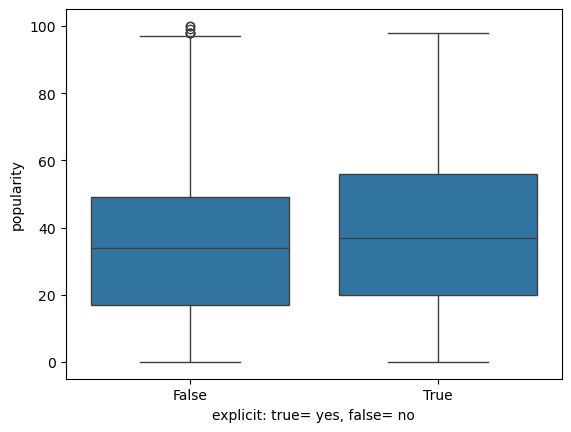

In [241]:
sns.boxplot(data=df, x='explicit' , y='popularity')
plt.xlabel('explicit: true= yes, false= no')

#### The box plot is used for continuous data. Here we can see that the explicit songs have a slightly higher average popularity. 
#### The line at the top  indicates that non explicit songs have become popular too. 
#### The dots above the non explicit box shows that cleaner language has gotten viral too (more than explicit). Those are outliers
#### Overall we can see that explicit songs tend to have a slightly higher popularity chance